### TODO:
* Possible to set two (or more) sets of coordinates? e.g. iline/xline and lat/lon
* `.to_segy` method
* orientation of plots (.T, origin)
* easy 64 -> 32 -> 16 -> u8

In [1]:
import segyio
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr
from ipywidgets import interact, IntSlider
import sys
sys.path.append("../")
import subsurface.seismic
from importlib import reload
reload(subsurface.seismic)


def p(i):
    seismic[:,:,i].plot()

C:\Users\r02as18\miniconda3\envs\seismic\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
# fp = "D:/datasets/iacopini_new_zealand/nz_realized"
fp = "D:/datasets/gullfaks/gullfaks.segy"

In [5]:
cube = segyio.tools.cube(fp)

In [6]:
extent = [452500, 459000, 6785500, 6788230, -1500, -2200]
xcoords, ycoords, zcoords = [np.linspace(extent[i], extent[i+1], cube.shape[int(i/2)]) for i in range(0,6,2)]
coords = [("x", xcoords), 
          ("y", ycoords), 
          ("z", zcoords)]

Load into Seismic wrapper for xr.DataArray from SEGY using `segyio`:

In [36]:
seismic = subsurface.seismic.from_segy(fp, coords=coords)

Create from `np.ndarray` (seismic cube):

In [17]:
interact(p, i=IntSlider(value=92, min=0, max=seismic.data.shape[2]-1))

interactive(children=(IntSlider(value=92, description='i', max=226), Output()), _dom_classes=('widget-interact…

<function __main__.p(i)>

Write slice to SEGY file:

In [11]:
seismic[:,:,10].to_segy("test_write.segy")

C:\Users\r02as18\miniconda3\envs\seismic\lib\site-packages\segyio\utils.py:18: RuntimeWarning: Implicit conversion to contiguous array
  warnings.warn(msg, RuntimeWarning)


In [12]:
seismic2 = subsurface.seismic.from_segy("test_write.segy")

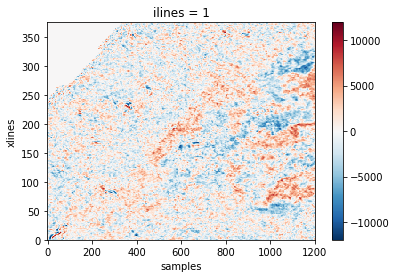

In [13]:
seismic2.plot()

## Plotting

NameError: name 'ax' is not defined

matplotlib.axes._subplots.AxesSubplot

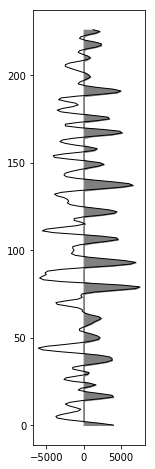

In [52]:
def _plot_1d(seismic):
    fig, ax = plt.subplots(figsize=(2,8))
    kwargs = dict(
        color="black",
        linewidth=1
    )
    y = np.arange(0, *seismic.data.shape)
    ax.plot(seismic.data, y, **kwargs)
    x1 = seismic.data.copy()
    x1[x1<=0] = 0
    ax.fill_betweenx(y, x1=x1, color="grey")
    return ax
    
    

type(_plot_1d(seismic[0,0,:]))

### Other

In [89]:
interact(p, i=IntSlider(value=92, min=0, max=seismic.data.shape[2]-1))

interactive(children=(IntSlider(value=92, description='i', max=744), Output()), _dom_classes=('widget-interact…

<function __main__.p(i)>

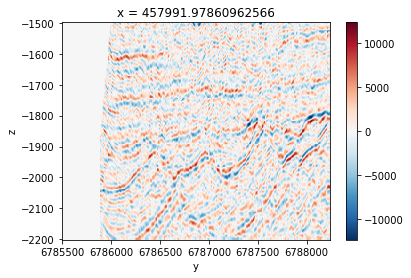

In [47]:
seismic.sel(x=458000, method="nearest").T.plot()

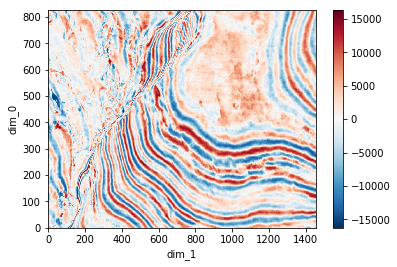

In [146]:
seismic[:, :, 150].plot()